In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

path_1 = 'ex1data1.txt'

data = pd.read_csv(path_1, header=None, names=['Population', 'Profit'])
length = len(data.index) # number of training examples

ones = pd.Series(1, index=data.index)
data.insert(0, 'ones', ones)
columns = data.shape[1]
X = data.iloc[:, 0:columns-1]
y = data.iloc[:, columns-1:columns]

X = np.matrix(X.values)
y = np.matrix(y.values)

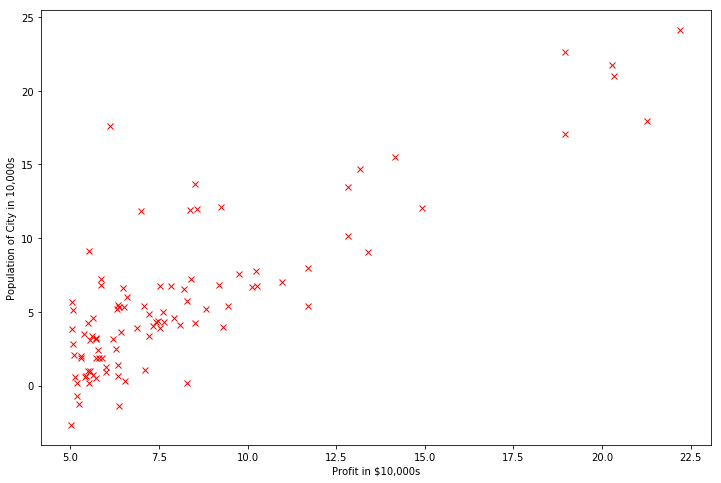

In [34]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_xlabel('Profit in $10,000s')
ax.set_ylabel('Population of City in 10,000s')
ax.plot(X[:,1], y, 'rx')

plt.show()

In [15]:
def computeCost(X, theta, y):
    hypothesis = X * theta.T
    cost = np.power((hypothesis - y), 2).sum() / (2 * length)
    return cost

In [16]:
def gradientDescent(X, y, theta, alpha, iterations):
    cost = np.zeros(iterations)
    for i in range(iterations):
        hypothesis = X * theta.T
        theta = theta - alpha / length * ((hypothesis - y).T * X) 
        cost[i] = computeCost(X, theta, y)
        
    return theta, cost

In [17]:
iterations = 1500
alpha = 0.01
theta = np.matrix(np.zeros((1, X.shape[1])))

In [18]:
# Initial cost
computeCost(X, theta, y)

32.072733877455676

In [19]:
theta, cost = gradientDescent(X, y, theta, alpha, iterations)
theta

matrix([[-3.63029144,  1.16636235]])

In [20]:
# Final cost
computeCost(X, theta, y)

4.4833882565877259

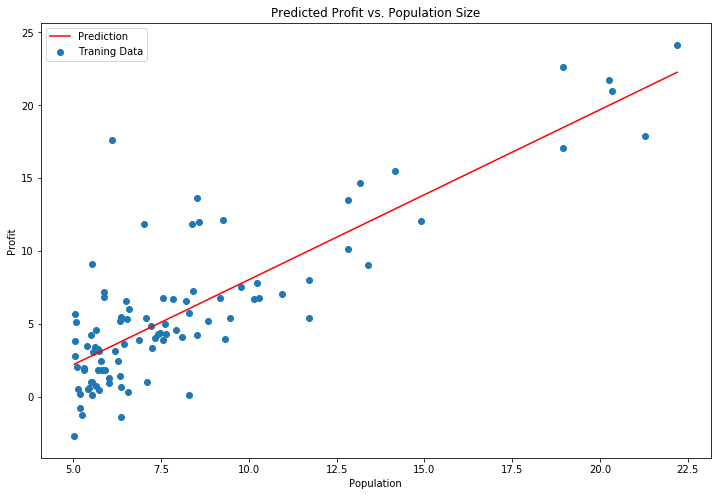

In [27]:
x = np.linspace(data.Population.min(), data.Population.max(), 2)
f = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

plt.show()

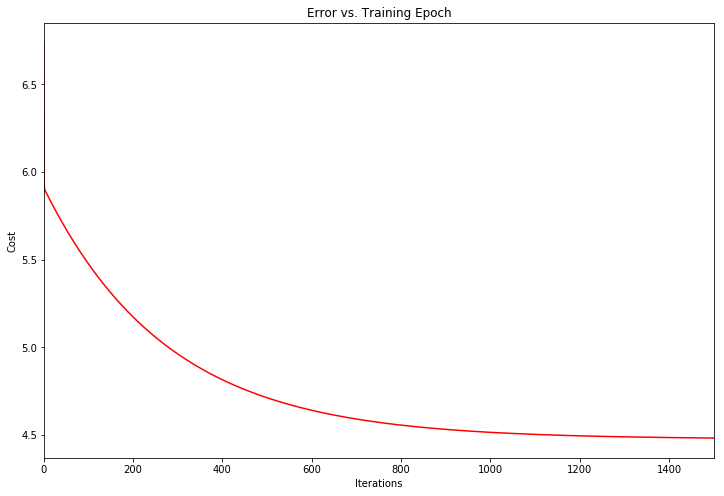

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

plt.show()